Question #1

Standard deviation shows the variability amongst individual values in a dataset. This dataset makes up ONE singular sample size. However, standard error of the mean requires multiple/many samples and shows the variability amongst those multiple samples, thus the name sample mean.  
https://chatgpt.com/share/66f8cc4e-7680-8004-9873-726dd0a51491 Here's the link to the chatgpt conversation I had about standard deviation vs. standard error of mean.

Question #6

1. What is the process of bootstrapping?
You will have your original sample of data points, and then you will make "bootstrap samples" out of this by picking random data values. The total number of data points will remain the same, but some points may get picked again while some do not (this is called Sampling with Replacement. Next, you will compute mean, median, variance, or whatever statistical analysis you want to do and you repeat the resampling and computing process as many times as possible. Now, you'll end up with a bunch of different values of whatever you computed; this is when you make observations such as where most of the values fall and infer that the actual mean, median, variance (or whatever you chose) of the overall population fall between the range you observed. This range is called the 95% confidence interval. You can create a histogram of the bootstrapped dataset values and see the standard error of the mean. 

2. What is the main purpose of bootstrapping?
In an ideal world, we can compute statistics from a dataset of a whole popualation, but in reality it is very difficult to do so. So instead, data scientists use bootstrapping to use what they have, which is a dataset of a sample, and draw conclusions about what the overall population's statistics(s) would be. 

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
You could use the sample you have with size n and make new samples (bootstrap samples) by picking random data points such that the new dataset will have a size n as well. Next, you resample, compute (whichever data statistic you want), repeat and then you will use that new collection of values and observe the range at which most of those values fall in. Then you compare such range to your hypothesized guess. If the guess falls within that range, then I'd say that is quite plausible (or if the range covers the guess).

Question #8

Introduction:

What is Null Hypothesis?

Null Hypothesis of "no effect" is a type of null hypothesis which states that there is no relationship, difference, or effect between two or more variables in a data set. Furthermore, it assumes that any variation or slight relationship between the variables occured solely due to chance. In AliTech's context, we would assume that people's health score would not change after they take the new vaccine, and even if there was some slight changes, we would assume that happened due to a different condition or chance. 

Data Visualization:

I created two histograms: one that shows the frequency of the Initial Health Scores and the Final Health Scores. This gives some context about how I want to compare the difference between Initial Health Scores and the Final Health Scores in an efficient way visually.

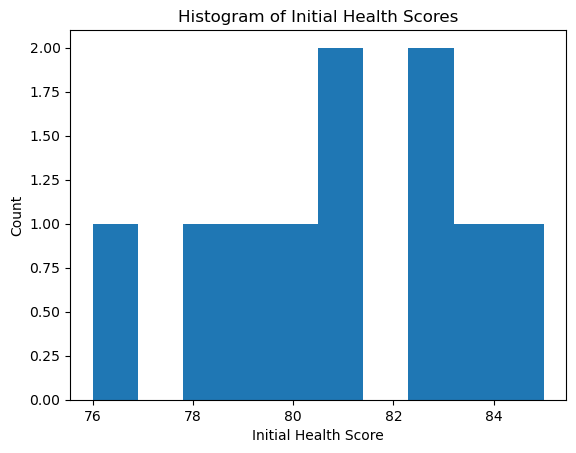

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Add Google Sheets URL with AliTech's data values
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTPjRZQs5h7GhY5fMUv49dB1Ahf7w9QFLmIUiVclEZtinhYSry9dukqh-UPP8nBDJHnA5qGesBifEb9/pub?output=csv'

# Use Google Sheets URL as CSV file and load it
df = pd.read_csv(url)

# Create the Histogram
plt.hist(df['InitialHealthScore'], bins = 10)
plt.xlabel('Initial Health Score')
plt.ylabel('Count')
plt.title('Histogram of Initial Health Scores')
plt.show()

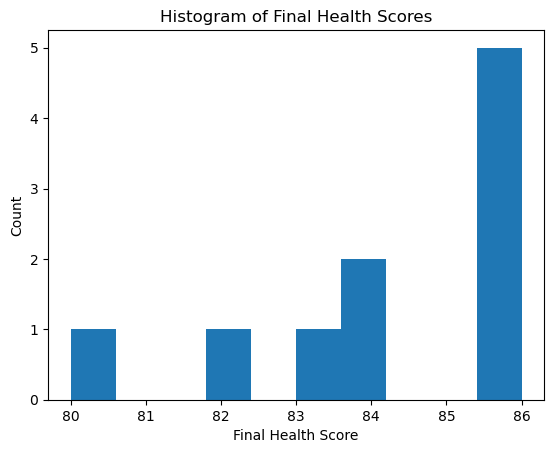

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Add Google Sheets URL with AliTech's data values
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTPjRZQs5h7GhY5fMUv49dB1Ahf7w9QFLmIUiVclEZtinhYSry9dukqh-UPP8nBDJHnA5qGesBifEb9/pub?output=csv'

# Use Google Sheets URL as CSV file and load it
df = pd.read_csv(url)

# Create the Histogram
plt.hist(df['FinalHealthScore'], bins = 10)
plt.xlabel('Final Health Score')
plt.ylabel('Count')
plt.title('Histogram of Final Health Scores')
plt.show()

The next step is seeing if the vaccine actually has an effect using a statistic method called Bootstrapping. The plan is to observe the difference of the sample means of the Initial and Final Health Scores by resampling data values from both Initial/Final health scores and then subtracting the difference of each resample and putting those values in a bootstrapping dataset. Then, we can find the 95% confidence interval, a range of values where the difference of means may lie (excluding the first %2.5 and %97.5 as those cases are rare). If the 95% confidence interval covers 0, then this will prove/accept the Null Hypothesis--if it does not, then this will reject the Null Hypothesis. 

I needed guidance on this step, so I asked ChatGPT for some help. Here is the link to the conversation:  https://chatgpt.com/share/66fef685-91b8-8004-8096-860c93d54999

The Code for bootstrapping and presented 95% confidence interval:

95% confidence interval for the difference in means: [1.2 5.4]


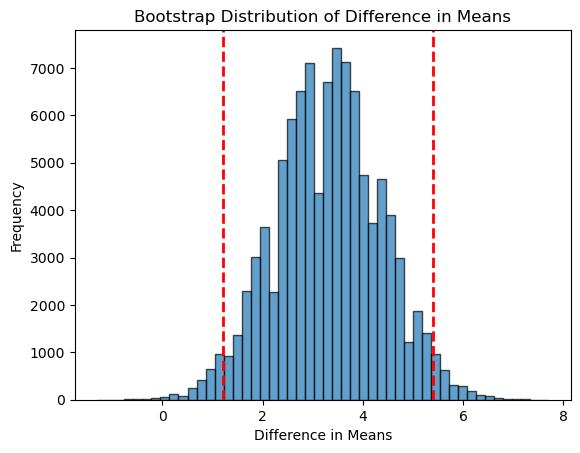

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame and has columns 'initial_health_scores' and 'final_health_scores'
# Replace these column names with the actual ones after checking.

# Number of bootstrap samples
n_iterations = 100000
boot_means_diff = []

# Extract initial and final health scores
initial_scores = df['InitialHealthScore']
final_scores = df['FinalHealthScore']

# Function to compute the difference in means
def difference_in_means(initial_scores, final_scores):
    return np.mean(final_scores) - np.mean(initial_scores)

# Perform bootstrap resampling
for i in range(n_iterations):
    # Resample with replacement
    resample_initial = np.random.choice(initial_scores, size=len(initial_scores), replace=True)
    resample_final = np.random.choice(final_scores, size=len(final_scores), replace=True)
    
    # Compute the difference in means for the resample
    mean_diff = difference_in_means(resample_initial, resample_final)
    
    # Store the result
    boot_means_diff.append(mean_diff)

# Convert to a NumPy array for easier analysis
boot_means_diff = np.array(boot_means_diff)

# Calculate the 95% confidence interval (percentiles)
confidence_interval = np.percentile(boot_means_diff, [2.5, 97.5])

# Print the confidence interval
print(f"95% confidence interval for the difference in means: {confidence_interval}")

# Plot the bootstrap distribution
plt.hist(boot_means_diff, bins=50, edgecolor='k', alpha=0.7)
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', linewidth=2)
plt.axvline(confidence_interval[1], color='red', linestyle='dashed', linewidth=2)
plt.title('Bootstrap Distribution of Difference in Means')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()


Conclusion:

It is evident that the 95% confidence interval does not contain "0" (0 indicates that there is no difference between the initial/final health score means, implying the vaccine has no effect). Thus, this bootstrapping process rejects the Null Hypothesis which implies that the vaccine indeed has an effect on patients. 

Regardless, it is still important to consider other possibilites that explain why this rejected the null hypothesis. For example, maybe there's variation regarding how long each patient was sick for. The longer a patient might be sick for, the more days they had to recover and thus the addition of the vaccine would help them recover much faster and efficiently compared to someone who just caught the sickness. The idea that a patient could have worse health conditions in general can also be applied here--those with worse health conditions may actually feel worse after the vaccine if they have unhealthy habits during that time interval. 